In [1]:
from seedtools import load_seed,show_all_datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc,classification_report
import numpy as np
import matplotlib.pyplot as plt

### CONTENTS 
-  ROC AUC CURVE

In [2]:
df =  load_seed("Social_Network_Ads.csv","v3",quiet=True).data 

ss =  StandardScaler()
for col in ["Age","EstimatedSalary"]:
    df[col] =  ss.fit_transform(df[col].values.reshape(-1,1))
    

x =  df.drop(columns=["Purchased"])
y =  df["Purchased"]

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)


In [3]:
model =  RandomForestClassifier()
model.fit(x_train,y_train)
print("Score :",model.score(x_test,y_test))

pred =  model.predict(x_test)
print(classification_report(y_test,pred))

Score : 0.875
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        56
           1       0.75      0.88      0.81        24

    accuracy                           0.88        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.88      0.88      0.88        80



### ROC AUC CURVE 

**predict probs**

In [4]:
y_scores =  model.predict_proba(x_test)[:,1]
y_scores[:3]

array([0.3 , 0.98, 0.91])

| AUC Value | Interpretation                    |
|-----------|------------------------------------|
| 1.0       | Perfect classifier ✅              |
| 0.9–1.0   | Excellent model ⭐                  |
| 0.8–0.9   | Good model 👍                      |
| 0.7–0.8   | Fair model 😐                      |
| 0.6–0.7   | Poor model ⚠️                      |
| 0.5       | No skill (random guessing) ❌      |
| < 0.5     | Worse than random (model is flipped) 🔁 |


**Plot the curve**

AUC SCORE :0.9263392857142857


Text(0, 0.5, 'True Positive Rate')

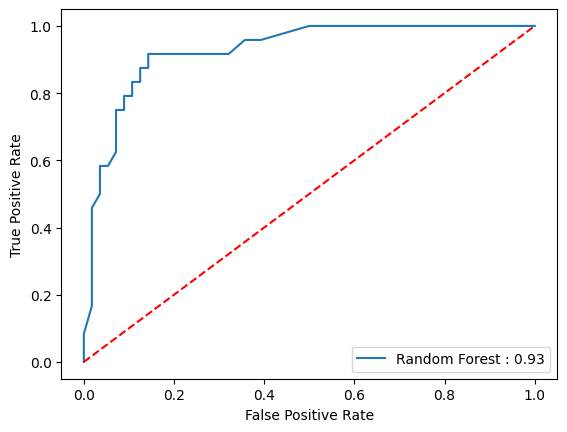

In [5]:
fpr,tpr,threshold =  roc_curve(y_test,y_scores)
roc_auc = auc(fpr, tpr)


print(f"AUC SCORE :{roc_auc}")


plt.plot(fpr,tpr,label=f"Random Forest : {roc_auc :.2f}")
plt.plot([0,1],[0,1],"r--")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#### *for each point it is calculated*

$if x_i > threshold_i =>  x_i =1$ <br />
$if x_i < threshold_i =>  x_i = 0$ <br />
At threshold = $\infty, predict : \text{ No  positive} ⇒ TPR = 0, FPR = 0$ <br />
At threshold = $ 0.0 \text{(very low)}, predict : \text{ all  positive} ⇒ TPR = 1, FPR = 1$

In [6]:
threshold 

array([ inf, 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.87, 0.86, 0.84, 0.75, 0.65, 0.63, 0.42, 0.4 , 0.08, 0.06,
       0.04, 0.03, 0.02, 0.01, 0.  ])

**Threshold overall for all**

In [8]:
optimal_idx = (tpr - fpr).argmax() # index of max value , starts with 0 
best_threshold = threshold[optimal_idx]
print("Best threshold :",best_threshold) # x_i > best_threshold =>  1 else 0

Best threshold : 0.4
